# Video Games Sales Analysis
### In this project, a data analysis of video games over the past years has been done, and meaningful insights are inferred. Visual statistics are also provided

#### Step 1: Importing the necessary libraries and printing the first few rows of the data sheet after reading it 

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'vgsales.csv'
df = pd.read_csv('vgsales.csv')
print('Dataframe loaded from .csv file:')
print(df.head())


Dataframe loaded from .csv file:
   Rank                      Name Platform  Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [16]:
# Display the structure of the dataset
df.info()

# Display basic statistical metrics
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  object 
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16596 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      2
dtype: int64

In [22]:
# Handle missing values for 'Year' - filling with the median year

# Handle missing values for 'Publisher' - filling with 'Unknown'
df['Publisher'].fillna('Unknown', inplace=True)

# Verify if missing values have been handled
df.isnull().sum()


C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_13032\1949786280.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Publisher'].fillna('Unknown', inplace=True)


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher         0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      2
dtype: int64

### Sorting and displaying the top most selling games:

Top 10 Highest-Grossing Games Globally:
                        Name  Global_Sales
0                 Wii Sports         82.74
1          Super Mario Bros.         40.24
2             Mario Kart Wii         35.82
3          Wii Sports Resort         33.00
4   Pokemon Red/Pokemon Blue         31.37
5                     Tetris         30.26
6      New Super Mario Bros.         30.01
7                   Wii Play         29.02
8  New Super Mario Bros. Wii         28.62
9                  Duck Hunt         28.31


C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_13032\1362314992.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=top_10_games, palette='viridis')


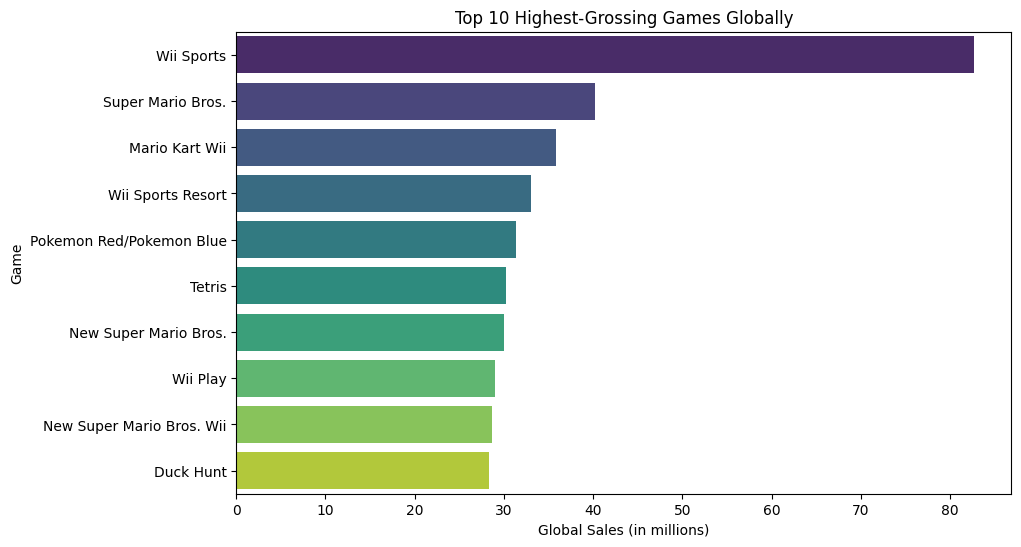

In [18]:
# Sort the dataset by Global Sales and select the top 10 games
top_10_games = df.sort_values(by='Global_Sales', ascending=False).head(10)

# Display the top 10 games
print("Top 10 Highest-Grossing Games Globally:")
print(top_10_games[['Name', 'Global_Sales']])

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(x='Global_Sales', y='Name', data=top_10_games, palette='viridis')
plt.title('Top 10 Highest-Grossing Games Globally')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Game')
plt.show()


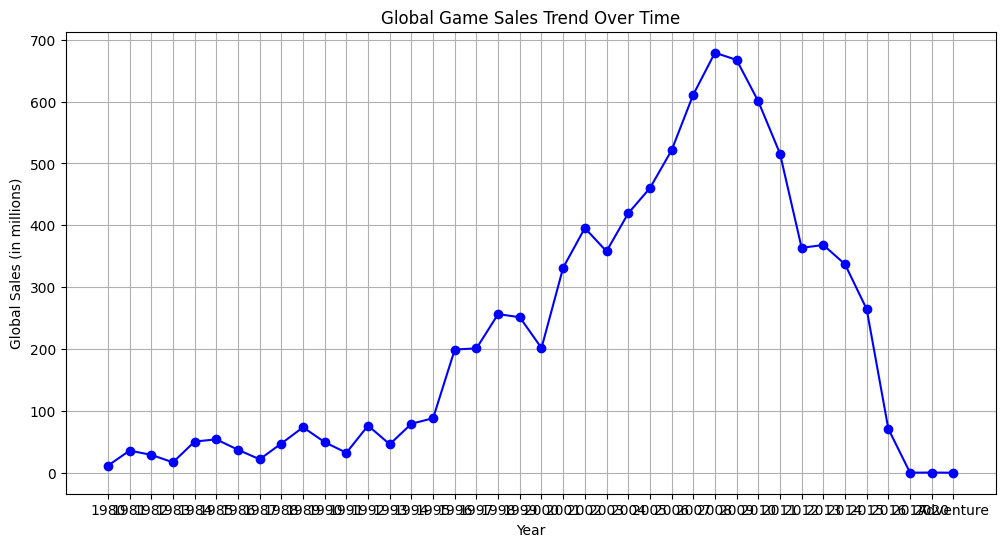

In [20]:

# Aggregate global sales by year
sales_trend = df.groupby('Year')['Global_Sales'].sum()

# Visualization
plt.figure(figsize=(12,6))
plt.plot(sales_trend.index, sales_trend.values, marker='o', linestyle='-', color='b')
plt.title('Global Game Sales Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.grid(True)
plt.show()


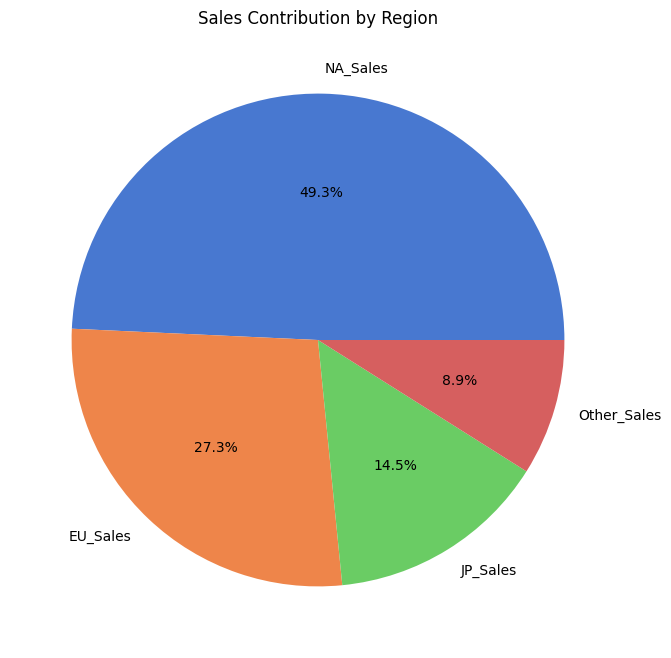

In [21]:
# Aggregate sales by region
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Visualization
plt.figure(figsize=(8,8))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', colors=sns.color_palette('muted'))
plt.title('Sales Contribution by Region')
plt.show()


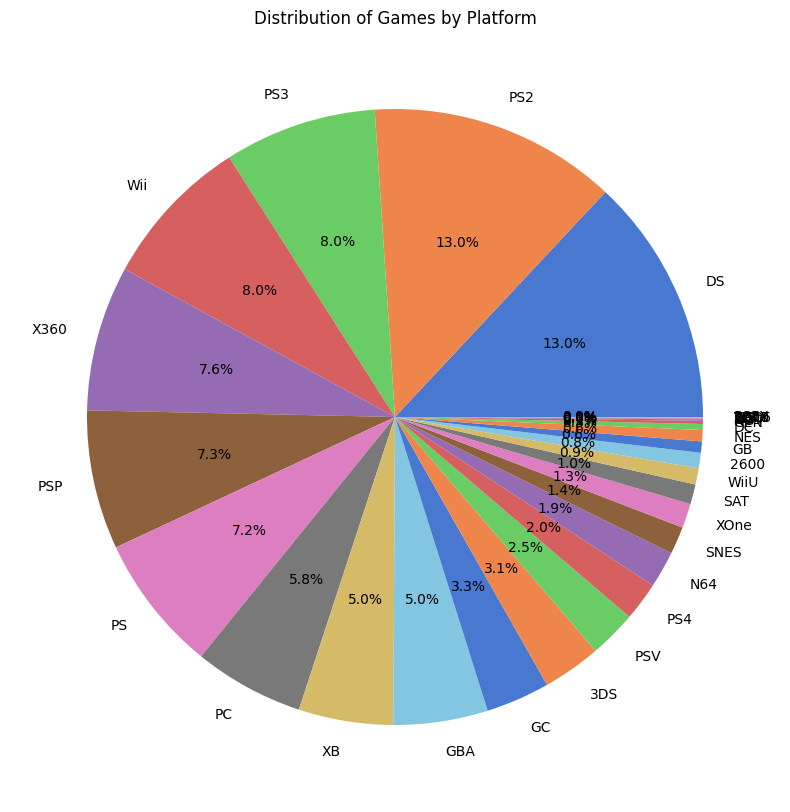

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate the number of games by platform
platform_distribution = df['Platform'].value_counts()

# Visualization
plt.figure(figsize=(10,10))
plt.pie(platform_distribution, labels=platform_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('muted'))
plt.title('Distribution of Games by Platform')
plt.show()
